In [20]:
import pandas as pd
import graphviz
from python_scripts import csv_processing as dp
from python_scripts import evaluation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

##### Import Data

In [3]:
df = pd.read_csv("../data/3year.csv")

In [6]:
X_train, X_test, y_train, y_test = dp.pre_process(df)

##### Decision Tree Model

In [4]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0)

##### XGBoost

In [5]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()

In [9]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtrain.save_binary('train.buffer')
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [10]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]

##### Training

In [11]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-auc:0.74765	eval-auc:0.71055
[1]	train-auc:0.79396	eval-auc:0.74394
[2]	train-auc:0.81569	eval-auc:0.74807
[3]	train-auc:0.83985	eval-auc:0.75275
[4]	train-auc:0.85423	eval-auc:0.77519


c:\Users\65835\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-auc:0.86387	eval-auc:0.77966
[6]	train-auc:0.87106	eval-auc:0.78198
[7]	train-auc:0.87592	eval-auc:0.78568
[8]	train-auc:0.88145	eval-auc:0.78804
[9]	train-auc:0.88703	eval-auc:0.78808


In [12]:
bst.save_model('bst1.model')

In [13]:
ypred = bst.predict(dtest)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

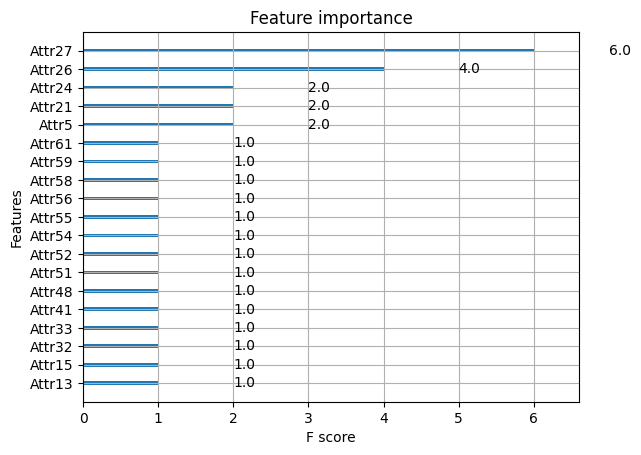

In [15]:
xgb.plot_importance(bst)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

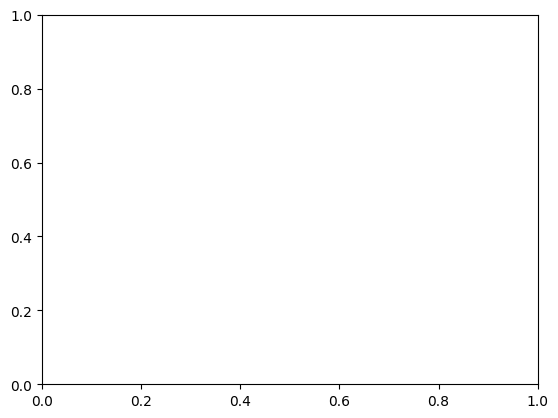

In [25]:
xgb.plot_tree(bst, num_trees=2)

In [23]:
xgb.to_graphviz(bst, num_trees=2)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH